In [1]:


import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:

df = pd.read_csv("dataset/42_placement.csv")
np.random.seed(1)
df.sample(2)

,cgpa,placement_exam_marks,placed
507,6.77,75.0,1
818,5.52,62.0,0


Cgpa is almost normally distributed. But  Placement Exam Marks is not normally distributed.We Will 
apply the IQR method in Placement_exam_marks column


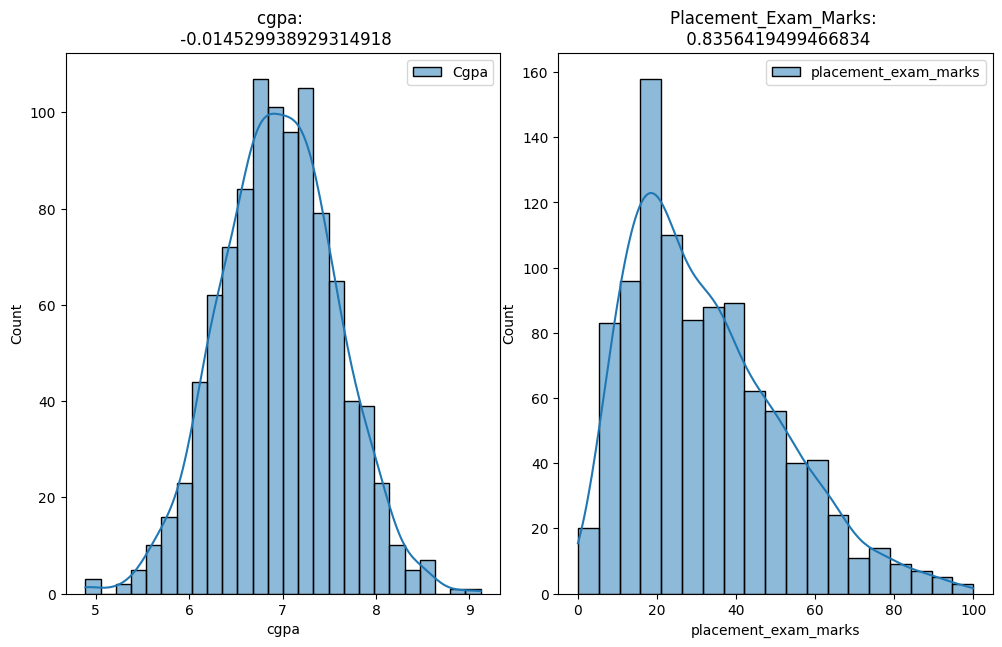

In [3]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
fig.tight_layout()

sns.histplot(data=df,x="cgpa",ax=ax[0],label = "Cgpa",kde=True)
ax[0].set_title(f"cgpa: \n {df["cgpa"].skew()}")
ax[0].legend()

sns.histplot(data=df,x="placement_exam_marks",ax=ax[1],label = "placement_exam_marks",kde=True)
ax[1].set_title(f"Placement_Exam_Marks: \n {df["placement_exam_marks"].skew()}")
ax[1].legend()

print('''Cgpa is almost normally distributed. But  Placement Exam Marks is not normally distributed.We Will 
apply the IQR method in Placement_exam_marks column''')


In [4]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

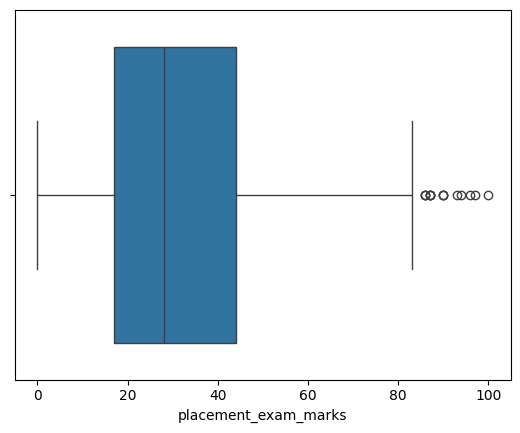

In [6]:

# right squed we have outliers in outter side:

sns.boxplot(data=df,x="placement_exam_marks") 


<br>

# step: 01 calculate IQR And Uper and Lower Limit

<br>


In [10]:

Q1 = df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)

# verify the value from describe() function
print("Q1: ",Q1)
print("Q3: ",Q3)

IQR = Q3-Q1
IQR


Q1:  17.0
Q3:  44.0


27.0

In [11]:

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print(upper_limit)
print(lower_limit)


84.5
-23.5


<br>

# Finding Outliers:

### Outiers are the datapoint where does not contain in the Whisker Boundary.

<br>

In [12]:
df[df["placement_exam_marks"] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [15]:

# we have right squred KDE and outliers in right side:

df[df['placement_exam_marks']<lower_limit]


,cgpa,placement_exam_marks,placed


<br>
<br>

# Trimming:

<br>
<br>

In [16]:
new_df = df[df['placement_exam_marks']<upper_limit]
new_df


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


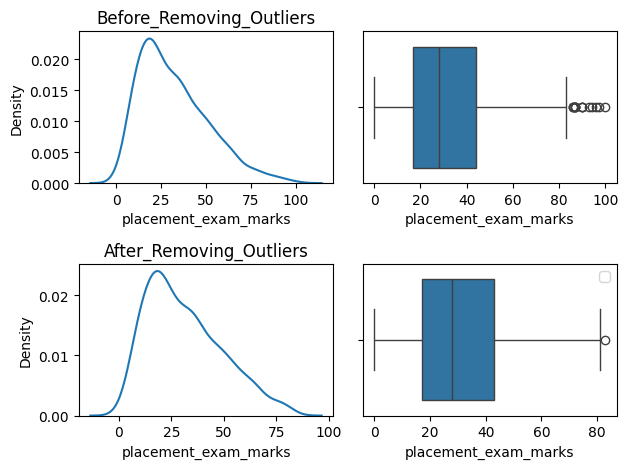

In [37]:


fig,ax = plt.subplots(nrows=2,ncols=2)

sns.kdeplot(x=df["placement_exam_marks"],ax=ax[0][0])
sns.boxplot(x=df["placement_exam_marks"],ax=ax[0][1])

sns.kdeplot(x=new_df["placement_exam_marks"],ax=ax[1][0])
sns.boxplot(x=new_df["placement_exam_marks"],ax=ax[1][1])

ax[0][0].set_title("Before_Removing_Outliers")
ax[1][0].set_title("After_Removing_Outliers")

fig.tight_layout()
plt.legend()



<br>
<br>

# Capping:

<br>
<br>

In [47]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    df['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        df['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)
new_df_cap.shape

(1000, 3)

In [48]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


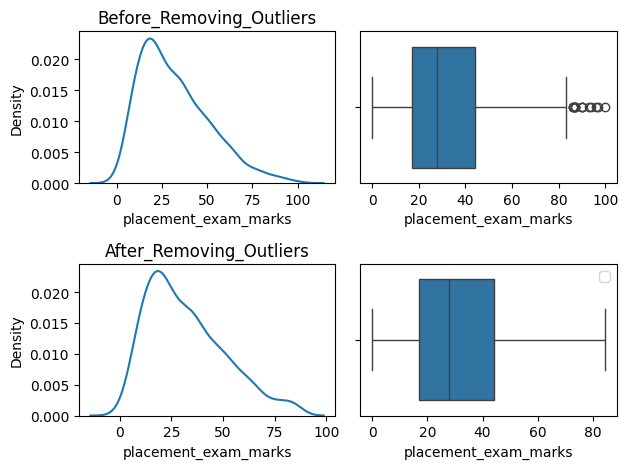

In [49]:


fig,ax = plt.subplots(nrows=2,ncols=2)

sns.kdeplot(x=df["placement_exam_marks"],ax=ax[0][0])
sns.boxplot(x=df["placement_exam_marks"],ax=ax[0][1])

sns.kdeplot(x=new_df_cap["placement_exam_marks"],ax=ax[1][0])
sns.boxplot(x=new_df_cap["placement_exam_marks"],ax=ax[1][1])

ax[0][0].set_title("Before_Removing_Outliers")
ax[1][0].set_title("After_Removing_Outliers")

fig.tight_layout()
plt.legend()

